In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import os, sys

In [2]:
path = "../data/happiness.csv"
df = pd.read_csv(path)

display(df)

,Countries,"Happiness index, 2022",Global rank,Available data
0,Finland,7.80,1,2013 - 2022
1,Denmark,7.59,2,2013 - 2022
2,Iceland,7.53,3,2013 - 2022
3,Israel,7.47,4,2013 - 2022
4,Netherlands,7.40,5,2013 - 2022
...,...,...,...,...
129,DR Congo,3.21,130,2017 - 2022
130,Zimbabwe,3.20,131,2013 - 2022
131,Sierra Leone,3.14,132,2013 - 2022
132,Lebanon,2.39,133,2013 - 2022


0 - Manipulação e Tratamento de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Countries              134 non-null    object 
 1   Happiness index, 2022  134 non-null    float64
 2   Global rank            134 non-null    int64  
 3   Available data         134 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [4]:
# Renomeando as colunas:
df = df.rename(columns={"Countries": "country", "Happiness index, 2022": "happiness", "Global rank": "ranking", "Available data": "date_of_data"})
display(df)

,country,happiness,ranking,date_of_data
0,Finland,7.80,1,2013 - 2022
1,Denmark,7.59,2,2013 - 2022
2,Iceland,7.53,3,2013 - 2022
3,Israel,7.47,4,2013 - 2022
4,Netherlands,7.40,5,2013 - 2022
...,...,...,...,...
129,DR Congo,3.21,130,2017 - 2022
130,Zimbabwe,3.20,131,2013 - 2022
131,Sierra Leone,3.14,132,2013 - 2022
132,Lebanon,2.39,133,2013 - 2022


In [5]:
# Trocando colunas com object para String:
df.country = df["country"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       134 non-null    object 
 1   happiness     134 non-null    float64
 2   ranking       134 non-null    int64  
 3   date_of_data  134 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [6]:
# Verifica se existem dados nulos (NaN):
if df.isnull().values.any():
    print("Existem dados nulos no conjunto de dados")
else:
    print("Não existem dados nulos no conjunto de dados")

sum_of_nulls = df.isnull().sum()
print("\nTotal de dados nulos por atributo:")
print(sum_of_nulls)

Não existem dados nulos no conjunto de dados

Total de dados nulos por atributo:
country         0
happiness       0
ranking         0
date_of_data    0
dtype: int64


In [7]:
# Verificando qual período de data disponível:
df["data_dos_dados"].unique()

KeyError: 'data_dos_dados'

1 - Estística Descritiva

In [ ]:
# Média, moda e mediana do Índice de felicidade de 2022 (Happiness Index, 2022:
mean = df["Happiness index, 2022"].mean()
median = df["Happiness index, 2022"].median()
mode = max(set(list(df["Happiness index, 2022"].values)), key=list(df["Happiness index, 2022"].values).count)

print("A média do índice de felicidade é: %.2f" % mean)
print("A mediana do índice de felicidade é: %.2f" % median)
print("A moda do índice de felicidade é: %.2f" % mode)

6.26
A média do índice de felicidade é: 5.54
A mediana do índice de felicidade é: 5.67
A moda do índice de felicidade é: 6.26


<Axes: >

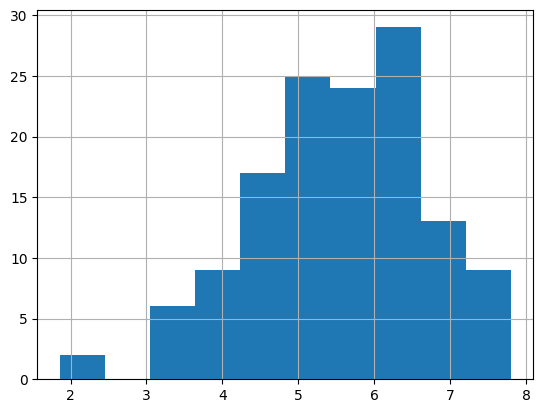

In [ ]:
df["Happiness index, 2022"].hist()